In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz


# Data preparation

In [88]:
df = pd.read_csv('PVGIS_NEW.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140255 entries, 0 to 140254
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        140255 non-null  object 
 1   temp_min    140255 non-null  float64
 2   temp_max    140255 non-null  float64
 3   pressure    140255 non-null  int64  
 4   humidity    140255 non-null  int64  
 5   wind_speed  140255 non-null  float64
 6   Gb(i)       140255 non-null  float64
 7   Gd(i)       140255 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 8.6+ MB


In [5]:
df

,time,temp_min,temp_max,pressure,humidity,wind_speed,Gb(i),Gd(i)
0,2005-01-01 00:00:00 +0000 UTC,1.76,4.16,1024,91,1.84,0.0,0.0
1,2005-01-01 01:00:00 +0000 UTC,2.07,4.43,1024,90,2.22,0.0,0.0
2,2005-01-01 02:00:00 +0000 UTC,1.44,3.93,1024,90,2.27,0.0,0.0
3,2005-01-01 03:00:00 +0000 UTC,1.43,3.92,1023,90,2.28,0.0,0.0
4,2005-01-01 04:00:00 +0000 UTC,1.22,3.78,1023,91,2.33,0.0,0.0
...,...,...,...,...,...,...,...,...
140250,2020-12-31 18:00:00 +0000 UTC,4.51,5.95,1013,85,1.98,0.0,0.0
140251,2020-12-31 19:00:00 +0000 UTC,3.94,5.39,1014,85,1.62,0.0,0.0
140252,2020-12-31 20:00:00 +0000 UTC,3.39,5.39,1015,88,1.71,0.0,0.0
140253,2020-12-31 21:00:00 +0000 UTC,4.98,5.44,1015,91,1.87,0.0,0.0


In [6]:
df['time'] = df['time'].str.replace(' UTC', '', regex=False)
df['time'] = pd.to_datetime(df['time'], utc=True)

In [7]:
df= df.set_index('time')

In [8]:
df.tz_convert('Europe/Rome')

,temp_min,temp_max,pressure,humidity,wind_speed,Gb(i),Gd(i)
time,,,,,,,
2005-01-01 01:00:00+01:00,1.76,4.16,1024,91,1.84,0.0,0.0
2005-01-01 02:00:00+01:00,2.07,4.43,1024,90,2.22,0.0,0.0
2005-01-01 03:00:00+01:00,1.44,3.93,1024,90,2.27,0.0,0.0
2005-01-01 04:00:00+01:00,1.43,3.92,1023,90,2.28,0.0,0.0
2005-01-01 05:00:00+01:00,1.22,3.78,1023,91,2.33,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-31 19:00:00+01:00,4.51,5.95,1013,85,1.98,0.0,0.0
2020-12-31 20:00:00+01:00,3.94,5.39,1014,85,1.62,0.0,0.0
2020-12-31 21:00:00+01:00,3.39,5.39,1015,88,1.71,0.0,0.0


In [9]:
df.columns

Index(['temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'Gb(i)',
       'Gd(i)'],
      dtype='object')

In [10]:
# df['hour'] = df.index.hour
df['day'] = df.index.dayofyear

In [11]:
# df['day'] = df.index.day
# df['month'] = df.index.month
df['Avg_Temp'] = (df['temp_min']+df['temp_max'])/2

In [12]:
df_filtered = df.loc['2005-01-01 00:00:00':'2019-12-31 23:00:00']

In [13]:
df_filtered

,temp_min,temp_max,pressure,humidity,wind_speed,Gb(i),Gd(i),day,Avg_Temp
time,,,,,,,,,
2005-01-01 00:00:00+00:00,1.76,4.16,1024,91,1.84,0.0,0.0,1,2.960
2005-01-01 01:00:00+00:00,2.07,4.43,1024,90,2.22,0.0,0.0,1,3.250
2005-01-01 02:00:00+00:00,1.44,3.93,1024,90,2.27,0.0,0.0,1,2.685
2005-01-01 03:00:00+00:00,1.43,3.92,1023,90,2.28,0.0,0.0,1,2.675
2005-01-01 04:00:00+00:00,1.22,3.78,1023,91,2.33,0.0,0.0,1,2.500
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,0.39,3.41,1029,87,2.08,0.0,0.0,365,1.900
2019-12-31 20:00:00+00:00,0.37,3.54,1029,86,2.15,0.0,0.0,365,1.955
2019-12-31 21:00:00+00:00,-0.12,3.09,1029,88,2.21,0.0,0.0,365,1.485


In [14]:

df_filtered = df_filtered.loc[:, ~df_filtered.columns.isin(['pressure', 'temp_min', 'temp_max'])]

In [15]:
variable = 'Gd(i)'

In [16]:
daily_averages = df_filtered.resample('D').mean()
input_data = []
output_label = []

# Loop over each day, aligning daily averages with the same day's hourly values
for i in range(len(daily_averages)):
    # Get daily average for the current day
    daily_avg = daily_averages.iloc[i]

    hourly_values = df_filtered[variable][i*24:(i+1)*24]

    if len(hourly_values) == 24:
        input_data.append(daily_avg.values)
        output_label.append(hourly_values.values)

In [17]:
date = daily_averages.index.date

<Axes: >

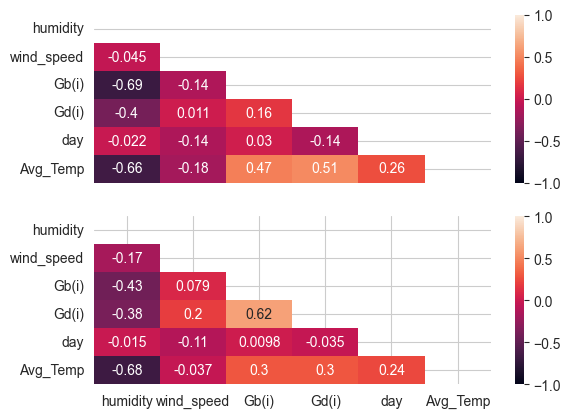

In [18]:
import seaborn as sns
daily_averages = df_filtered.resample('D').mean()

fig, axs = plt.subplots(2)

mask_1 = np.triu(np.ones_like(daily_averages.corr(), dtype=bool))
sns.heatmap(daily_averages.corr(),mask = mask_1, vmin=-1, vmax=1, annot=True, ax = axs[0],xticklabels=False)

mask_2 = np.triu(np.ones_like(df_filtered.corr(), dtype=bool))
sns.heatmap(df_filtered.corr(),mask = mask_2, vmin=-1, vmax=1, annot=True, ax = axs[1])

In [19]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, StandardScaler

# 2   RobustScaler 
# scaler = StandardScaler()
# scaler.fit_transform(input_data)
# 
# label_scaler = StandardScaler()
# label_scaler.fit_transform(output_label)
# 
# # Transform both training and test data
# input_scaled = scaler.transform(input_data)
# output_scaled = label_scaler.transform(output_label)

input_scaled = np.array(input_data)
output_scaled = np.array(output_label)
# output_scaled = np.array(output_label_2)

In [20]:
# Calculate indices for splitting
total_samples = len(input_data)
train_end = int(total_samples * 0.7)
val_end = int(total_samples * 0.85)

# Split the dataset
train_features, train_labels = input_scaled[:train_end], output_scaled[:train_end]
validation_features, validation_labels = input_scaled[train_end:val_end], output_scaled[train_end:val_end]
test_features, test_labels = input_scaled[val_end:], output_scaled[val_end:]

## Splitting the train, test, and validation sets

Check if it is ok to have same scaler for train, test, and validation dataset; or we need separate scaler.

# Define the Recurrent Neural Network

In [64]:
input_features2 = np.expand_dims(train_features, axis=1)
validation_features2 = np.expand_dims(validation_features, axis=1)
test_features2 = np.expand_dims(test_features, axis=1)

In [77]:
import numpy as np

def create_sequences(input_features, output_labels, time_steps=7):
    X, y = [], []
    for i in range(len(input_features) - time_steps):
        # Extract a sequence of 7 days of features
        X.append(input_features[i:(i + time_steps)])
        # Assume output_labels are the targets for the last day in the sequence
        y.append(output_labels[i + time_steps])
    return np.array(X), np.array(y)

# Assuming `input_features` is your original dataset with shape (3834, 6)
# and `output_labels` is your dataset with hourly solar irradiance values with shape (3834, 24)
X, y = create_sequences(train_features, train_labels)

print("Shape of X:", X.shape)  # Expected shape: (samples, 7, 6)
print("Shape of y:", y.shape)  # Expected shape: (samples, 24)


Shape of X: (3827, 7, 6)
Shape of y: (3827, 24)


In [78]:
import tensorflow as tf

# Define your model architecture
model_RNN = tf.keras.models.Sequential([
    # Assuming input_shape is (24, features) for 24 hourly observations per day
    # You might need to adjust 'input_shape' based on your actual feature set
    tf.keras.layers.LSTM(64, input_shape=(7, 6), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24)  # Predicting 24 hourly values
])

# Compile the model
model_RNN.compile(optimizer='adam', loss='mse')

In [79]:
model_RNN_history = model_RNN.fit(X, y, epochs=1000, batch_size=10)

Epoch 1/1000
383/383 [==============================] - 2s 2ms/step - loss: 13525.4355
Epoch 2/1000
383/383 [==============================] - 1s 2ms/step - loss: 11849.4824
Epoch 3/1000
383/383 [==============================] - 1s 2ms/step - loss: 10477.7012
Epoch 4/1000
383/383 [==============================] - 1s 2ms/step - loss: 9286.0830
Epoch 5/1000
383/383 [==============================] - 1s 2ms/step - loss: 8241.4912
Epoch 6/1000
383/383 [==============================] - 1s 2ms/step - loss: 7325.9556
Epoch 7/1000
383/383 [==============================] - 1s 2ms/step - loss: 6524.5474
Epoch 8/1000
383/383 [==============================] - 1s 2ms/step - loss: 5824.4492
Epoch 9/1000
383/383 [==============================] - 1s 2ms/step - loss: 5215.0908
Epoch 10/1000
383/383 [==============================] - 1s 2ms/step - loss: 4689.9189
Epoch 11/1000
383/383 [==============================] - 1s 2ms/step - loss: 4240.3667
Epoch 12/1000
383/383 [==========================

KeyError: 'val_loss'

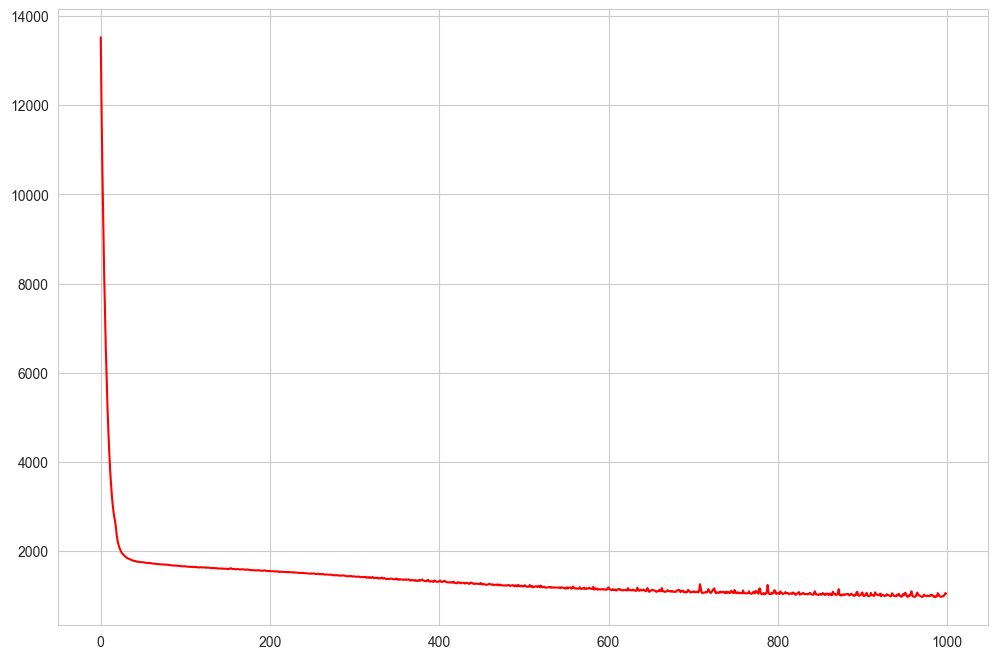

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(model_RNN_history.history['loss'], 'r', label='train')
plt.plot(model_RNN_history.history['val_loss'], 'b' ,label='val')
plt.xlabel(r'Epoch')
plt.ylabel(r'Loss')
plt.legend()

plt.tick_params()


Train the Model

# Evaluate the model on test and validation

In [83]:
test_features2 = np.expand_dims(test_features, axis=1)
# Evaluate the model
loss_test = model_RNN.evaluate(X, y, verbose=1)
print(f"Test MSE on test dataset: {loss_test}")


120/120 [==============================] - 0s 1ms/step - loss: 964.3230
Test MSE on test dataset: 964.322998046875


120/120 [==============================] - 0s 1ms/step


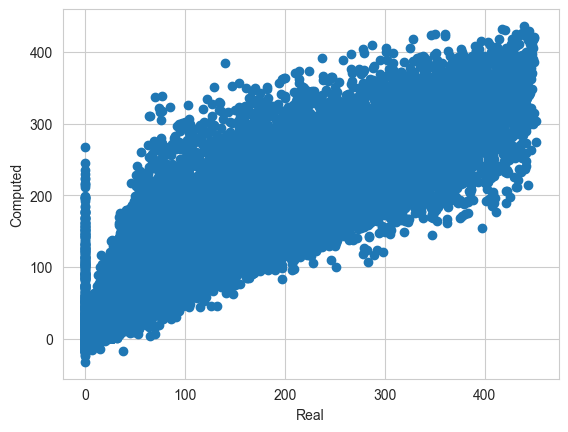

In [84]:



predictions_test = model_RNN.predict(X)
plt.scatter(y, predictions_test)
plt.xlabel('Real')
plt.ylabel('Computed')
plt.show()

In [85]:
loss_val = model_RNN.evaluate(X, y, verbose=0)
print(f"Test MSE on validation dataset: {loss_val}")

Test MSE on validation dataset: 964.322998046875


120/120 [==============================] - 0s 855us/step


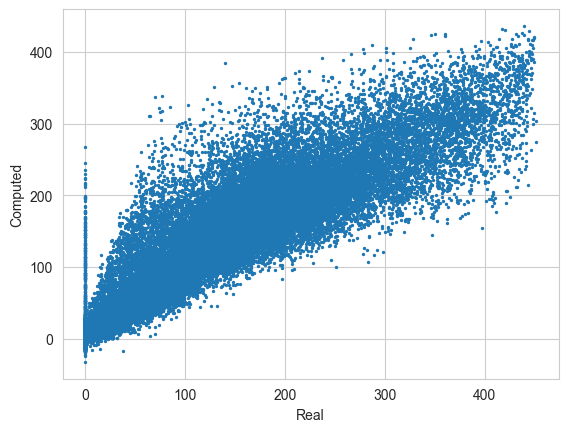

In [86]:
validation_test = model_RNN.predict(X)
plt.scatter(y, validation_test, s=2)
plt.xlabel('Real')
plt.ylabel('Computed')
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error, r2_score


computed_hourly_values_scaled = model_RNN.predict(pd.DataFrame(input_data))
# computed_hourly_values_unscaled = label_scaler.inverse_transform(computed_hourly_values_scaled)
# predicted_hourly_values_1D = computed_hourly_values_unscaled.reshape(-1)
predicted_hourly_values_1D = computed_hourly_values_scaled.reshape(-1)
rmse = np.sqrt(mean_squared_error(pd.DataFrame(df_filtered[variable]).reset_index(drop=True), predicted_hourly_values_1D))
r_squared = r2_score(pd.DataFrame(df_filtered[variable]).reset_index(drop=True), predicted_hourly_values_1D)

print(f'rmse: {round(rmse,4)}')
print(f'R2: {round(r_squared,4)}')

172/172 [==============================] - 0s 289us/step
rmse: 30.2445
R2: 0.903


In [203]:
predicted_hourly_values_1D

array([ 0.01332847, -0.05968321,  0.12659411, ...,  0.09270437,
       -0.1298163 , -0.06943129], dtype=float32)

# Evaluating the results on new year

In [208]:
df_2006 = df.loc['2020-01-01 00:00:00':'2020-12-30 23:00:00']

In [209]:
df_2006['Avg_Temp'] = (df_2006['temp_min']+df_2006['temp_max'])/2
df_2006 = df_2006.loc[:, ~df_2006.columns.isin(['pressure', 'temp_min', 'temp_max'])]

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gq/T/ipykernel_81459/2485192568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2006['Avg_Temp'] = (df_2006['temp_min']+df_2006['temp_max'])/2


In [210]:
df_2006 = df_2006.loc[:, df_2006.columns != 'pressure']

In [211]:
daily_averages_2006 = df_2006.resample('D').mean()
# daily_averages_2006_scaled = scaler.transform(daily_averages_2006)

In [212]:
predicted_hourly_values_scaled = model.predict(daily_averages_2006)

12/12 [==============================] - 0s 354us/step


In [213]:
# predicted_hourly_values_scaled = np.where(predicted_hourly_values_scaled < 0, 0, predicted_hourly_values_scaled)

In [214]:
# predicted_hourly_values_unscaled = label_scaler.inverse_transform(predicted_hourly_values_scaled)
# predicted_hourly_values_1D = predicted_hourly_values_unscaled.reshape(-1)
predicted_hourly_values_1D = predicted_hourly_values_scaled.reshape(-1)

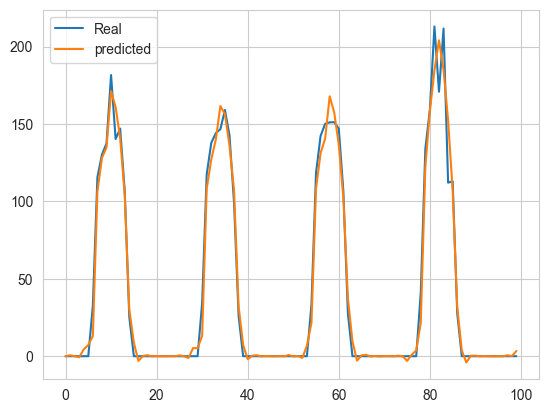

In [215]:
start_hour = 0
end_hour = 100
# Extract the subset for both predicted and actual values
subset_predicted = predicted_hourly_values_1D[start_hour:end_hour]
subset_actual = df_2006[variable][start_hour:end_hour]

plt.plot(pd.DataFrame(subset_actual).reset_index(drop=True), label = 'Real')
plt.plot(subset_predicted, label = 'predicted')
plt.legend()
plt.show()

In [216]:
real_solar = pd.DataFrame(df_2006[variable]).reset_index(drop=True)
predicted_solar = predicted_hourly_values_1D

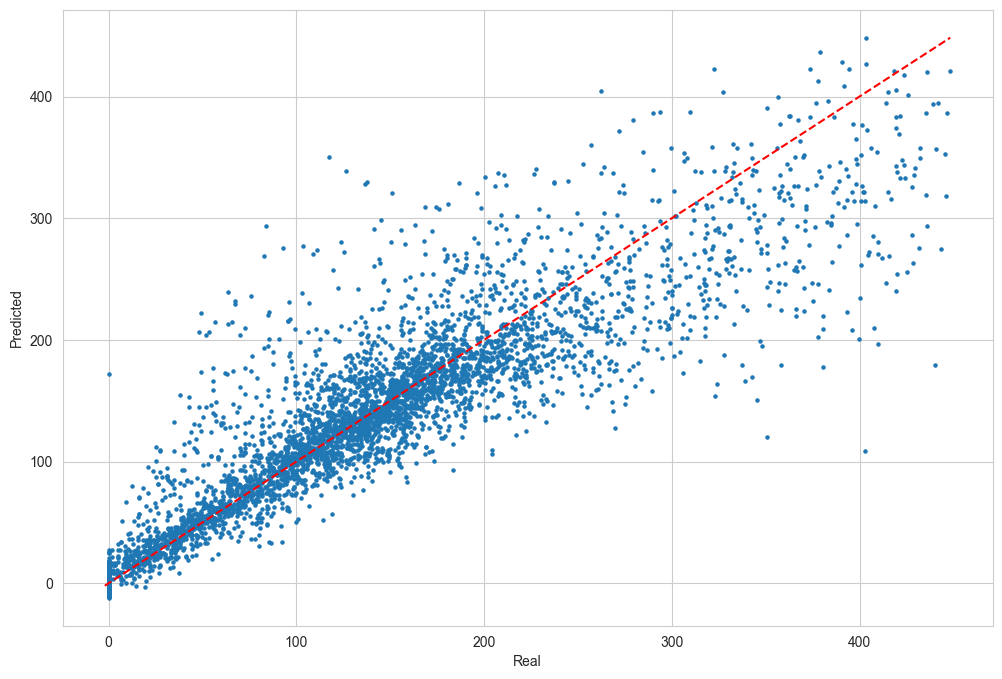

In [217]:
plt.figure(figsize=(12,8))
plt.scatter(real_solar, predicted_solar, s=5)
max_value = max(max(real_solar.values)[0], predicted_solar.max())
min_value = min(min(real_solar.values)[0], predicted_solar.min())
plt.plot([-2, max_value], [-2, max_value], 'r--')  # Red dashed line
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(pd.DataFrame(df_2006[variable]).reset_index(drop=True), predicted_hourly_values_1D))
r_squared = r2_score(pd.DataFrame(df_2006[variable]).reset_index(drop=True), predicted_hourly_values_1D)
print("R-squared:", r_squared)
print("RMSE:", rmse)


R-squared: 0.9033071940142828
RMSE: 30.2016082065143


In [219]:
threshold = 1
predicted_solar[predicted_solar < threshold] = 0
predicted_solar

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

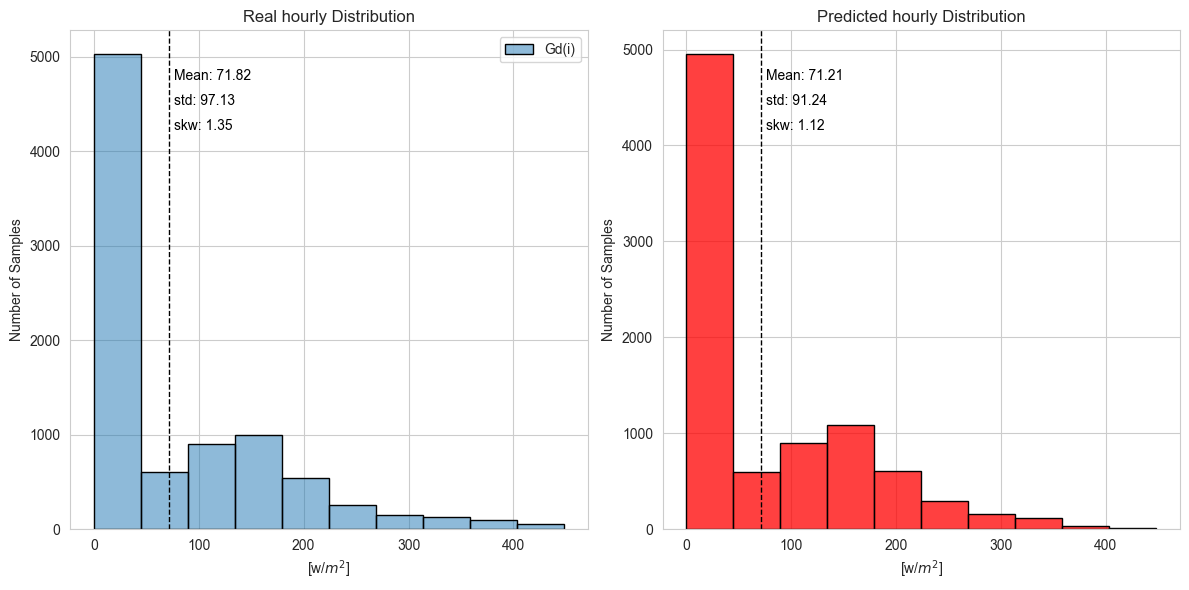

In [220]:
import seaborn as sns

mean_real = real_solar.mean()[0]
std_real = np.std(real_solar)[0]
skw_real = real_solar.skew()[0]

mean_predicted = abs(predicted_solar).mean()
std_predicted = np.std(abs(predicted_solar))
skw_predicted = abs(pd.DataFrame(predicted_solar)).skew()[0]


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(real_solar, kde=False, bins=10, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Real hourly Distribution')
axs[0].set_xlabel('[w/$m^2$]')
axs[0].set_ylabel('Number of Samples')
# axs[0].set_xlim(0,500)


axs[0].axvline(mean_real, color='k', linestyle='dashed', linewidth=1)
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.9, 'Mean: {:.2f}'.format(mean_real), color = 'black')

# axs[0].axvline(mean_real+std_real, color='red', linestyle='dashed', linewidth=1)
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.85, 'std: {:.2f}'.format(std_real), color = 'black')
axs[0].text(mean_real+5, max(axs[0].get_ylim())*0.8, 'skw: {:.2f}'.format(skw_real), color = 'black')
# 
# axs[0].axvline(mean_real-std_real, color='red', linestyle='dashed', linewidth=1)
# axs[0].text(mean_real-std_real, max(axs[0].get_ylim())*0.9, '-std: {:.2f}'.format(mean_real-std_real), color = 'black')


sns.histplot(predicted_solar, kde=False, bins=10, color='red', edgecolor='black', ax=axs[1])
axs[1].set_title('Predicted hourly Distribution')
axs[1].set_xlabel('[w/$m^2$]')
axs[1].set_ylabel('Number of Samples')
# axs[1].set_xlim(0,500)


axs[1].axvline(mean_predicted, color='k', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.9, 'Mean: {:.2f}'.format(mean_predicted), color = 'black')

# axs[1].axvline(mean_predicted+std_predicted, color='red', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.85, 'std: {:.2f}'.format(std_predicted), color = 'black')
axs[1].text(mean_predicted+5, max(axs[1].get_ylim())*0.8, 'skw: {:.2f}'.format(skw_predicted), color = 'black')
# 
# axs[1].axvline(mean_predicted-std_predicted, color='red', linestyle='dashed', linewidth=1)
# axs[1].text(mean_predicted-std_predicted, max(axs[1].get_ylim())*0.9, '-std: {:.2f}'.format(mean_predicted-std_predicted), color = 'black')

plt.tight_layout()
plt.show()

In [221]:
data = pd.concat([pd.DataFrame(predicted_solar),real_solar], axis=1)

In [222]:
data = data.rename(columns={0: "predicted", 'Gd(i)': "real"})

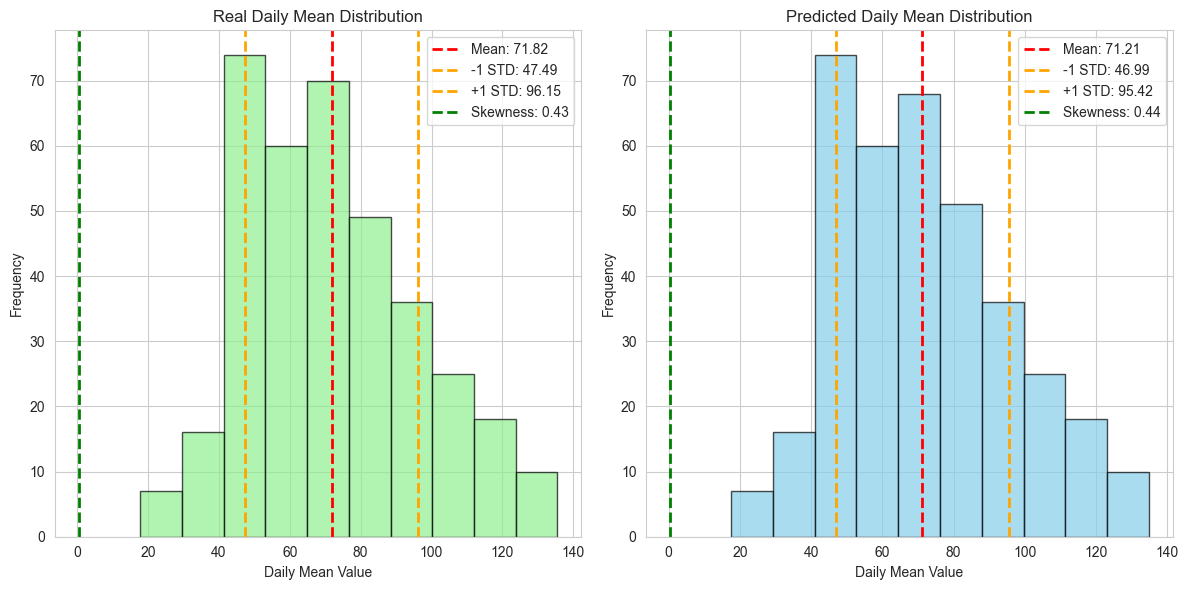

In [223]:
from scipy.stats import skew

daily_means = data.groupby(np.arange(len(data)) // 24).mean()
# Calculate mean, standard deviation, and skewness for both datasets
daily_means
stats_predicted = {
    'mean': daily_means['predicted'].mean(),
    'std': daily_means['predicted'].std(),
    'skewness': skew(daily_means['predicted'])
}

stats_real = {
    'mean': daily_means['real'].mean(),
    'std': daily_means['real'].std(),
    'skewness': skew(daily_means['real'])
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(daily_means['real'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(stats_real['mean'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {stats_real['mean']:.2f}")
axes[0].axvline(stats_real['mean'] - stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"-1 STD: {stats_real['mean'] - stats_real['std']:.2f}")
axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_real['skewness']:.2f}")
axes[0].set_title('Real Daily Mean Distribution')
axes[0].set_xlabel('Daily Mean Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_means['predicted'], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(stats_predicted['mean'], color='red', linestyle='dashed', linewidth=2, label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['mean'] - stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"-1 STD: {stats_predicted['mean'] - stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2, label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2, label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Predicted Daily Mean Distribution')
axes[1].set_xlabel('Daily Mean Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)



plt.tight_layout()
plt.show()


# Wind Speed

In [160]:
daily_averages = df_filtered.resample('D').mean()
train_features = []
train_labels = []

# Loop over each day, aligning daily averages with the same day's hourly values
for i in range(len(daily_averages)):
    # Get daily average for the current day
    daily_avg = daily_averages.iloc[i]

    # Get the 24 hourly values for the same day
    hourly_values = df_filtered['wind_speed'][i*24:(i+1)*24]

    # Ensure we have 24 hourly values
    if len(hourly_values) == 24:
        train_features.append(daily_avg.values)
        train_labels.append(hourly_values.values)

In [96]:
# Calculate indices for splitting
total_samples = len(train_features)
train_end = int(total_samples * 0.7)
val_end = int(total_samples * 0.85)

# Split the dataset
train_feat, train_lab = train_features[:train_end], train_labels[:train_end]
val_features, val_labels = train_features[train_end:val_end], train_labels[train_end:val_end]
test_features, test_labels = train_features[val_end:], train_labels[val_end:]
train_feat = np.vstack(train_feat)
train_lab = np.vstack(train_lab)

val_features = np.vstack(val_features)
val_labels = np.vstack(val_labels)

test_features = np.vstack(test_features)
test_labels = np.vstack(test_labels)

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)

label_scaler = MinMaxScaler()
label_scaler.fit_transform(train_labels)

# Transform both training and test data
train_features_scaled = scaler.transform(train_feat)
train_lab_scaled = label_scaler.transform(train_lab)

test_features_scaled = scaler.transform(test_features)
test_labels_scaled = label_scaler.transform(test_labels)

val_features_scaled = scaler.transform(val_features)
val_labels_scaled = label_scaler.transform(val_labels)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2


l2_factor = 0.05

model = Sequential([
    Dense(units=40, activation='relu', input_shape= (train_features_scaled.shape[1],),kernel_regularizer=l2(l2_factor)),
    Dense(units=24,kernel_regularizer=l2(l2_factor))  # Output layer
])

model.compile(optimizer='sgd', loss='mae')  # Using SGD as a more efficient form of gradient descent, mse
history = model.fit(train_features_scaled, train_lab_scaled, epochs=600, batch_size=10, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 5478
  y sizes: 3834
Make sure all arrays contain the same number of samples.

In [51]:
# Train model



Epoch 1/600
282/282 [==============================] - 0s 262us/step - loss: 0.1845
Epoch 2/600
282/282 [==============================] - 0s 230us/step - loss: 0.1212
Epoch 3/600
282/282 [==============================] - 0s 228us/step - loss: 0.1138
Epoch 4/600
282/282 [==============================] - 0s 231us/step - loss: 0.1101
Epoch 5/600
282/282 [==============================] - 0s 237us/step - loss: 0.1069
Epoch 6/600
282/282 [==============================] - 0s 226us/step - loss: 0.1040
Epoch 7/600
282/282 [==============================] - 0s 234us/step - loss: 0.1013
Epoch 8/600
282/282 [==============================] - 0s 231us/step - loss: 0.0986
Epoch 9/600
282/282 [==============================] - 0s 230us/step - loss: 0.0961
Epoch 10/600
282/282 [==============================] - 0s 226us/step - loss: 0.0937
Epoch 11/600
282/282 [==============================] - 0s 230us/step - loss: 0.0915
Epoch 12/600
282/282 [==============================] - 0s 231us/step - lo

KeyboardInterrupt: 

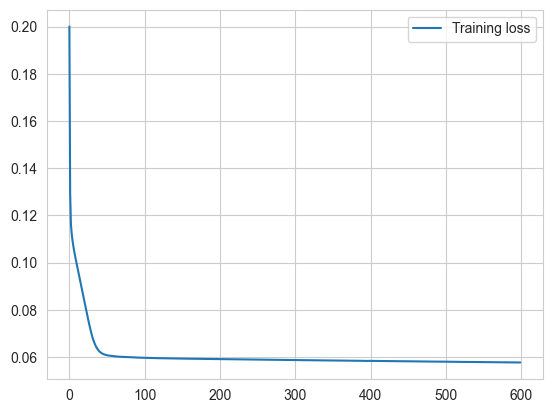

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.show()

In [73]:
# Evaluate the model
loss = model.evaluate(test_features_scaled, test_labels_scaled, verbose=0)
print(f"Test MSE: {loss}")


Test MSE: 0.05583053082227707


In [74]:
predictions_test = model.predict(test_features_scaled)
loss = model.evaluate(val_features_scaled, val_labels_scaled, verbose=0)
print(f"Test MSE: {loss}")

19/19 [==============================] - 0s 333us/step
Test MSE: 0.06040462478995323


In [75]:
df_2006 = df_filtered.loc['2005-01-01 00:00:00':'2005-12-31 23:00:00']
daily_averages_2006 = df_2006.resample('D').mean()
daily_averages_2006_scaled = scaler.transform(daily_averages_2006)
predicted_hourly_values_scaled = model.predict(daily_averages_2006_scaled)
predicted_hourly_values_scaled = np.where(predicted_hourly_values_scaled < 0, 0, predicted_hourly_values_scaled)
predicted_hourly_values_unscaled = label_scaler.inverse_transform(predicted_hourly_values_scaled)
predicted_hourly_values_1D = predicted_hourly_values_unscaled.reshape(-1)

12/12 [==============================] - 0s 402us/step


/Users/roozbeh/anaconda3/envs/SEST/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


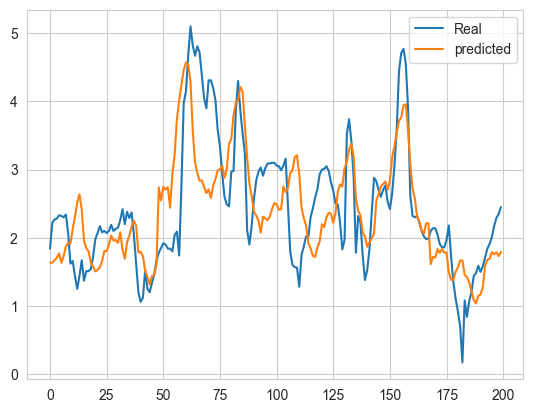

In [76]:
start_hour = 0
end_hour = 200
# Extract the subset for both predicted and actual values
subset_predicted = predicted_hourly_values_1D[start_hour:end_hour]
subset_actual = df_2006['wind_speed'][start_hour:end_hour]

plt.plot(pd.DataFrame(subset_actual).reset_index(drop=True), label='Real')
plt.plot(subset_predicted, label='predicted')
plt.legend()
plt.show()


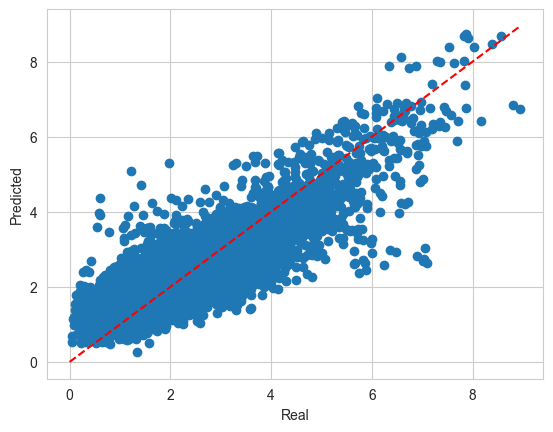

In [77]:
real_solar = pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True)
predicted_solar = predicted_hourly_values_1D
plt.scatter(real_solar, predicted_solar)
max_value = max(max(real_solar.values)[0], predicted_solar.max())
min_value = min(min(real_solar.values)[0], predicted_solar.min())
plt.plot([0, max_value], [0, max_value], 'r--')  # Red dashed line
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True), predicted_hourly_values_1D))
r_squared = r2_score(pd.DataFrame(df_2006['wind_speed']).reset_index(drop=True), predicted_hourly_values_1D)
print("R-squared:", r_squared)
print("RMSE:", rmse)

R-squared: 0.734686664612785
RMSE: 0.6368129227796818


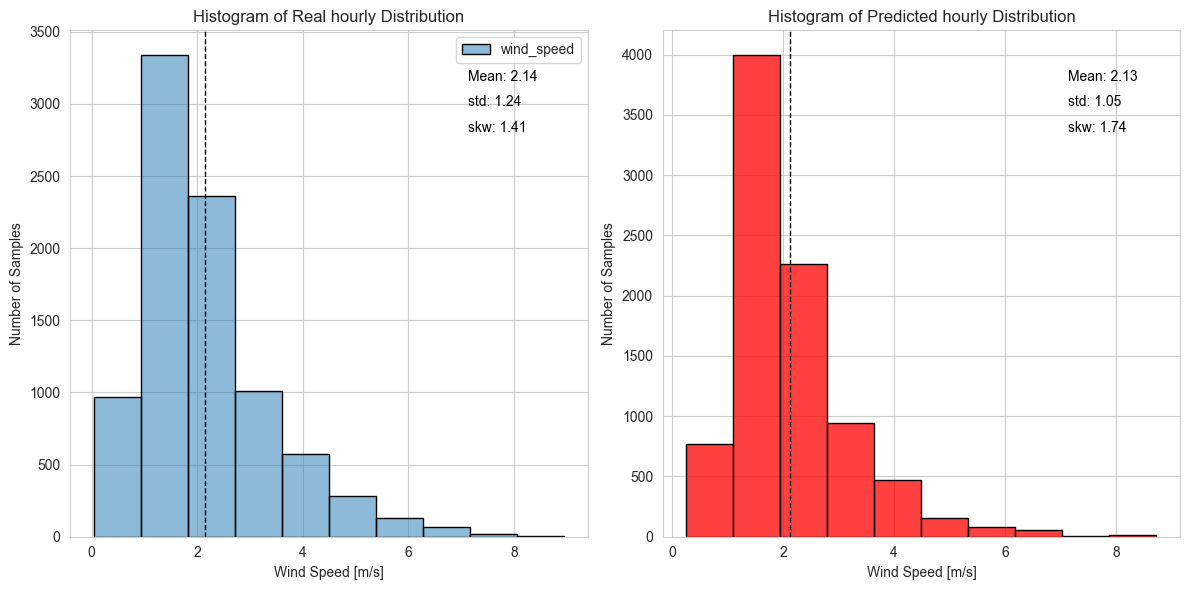

In [78]:
import seaborn as sns

mean_real = real_solar.mean()[0]
std_real = np.std(real_solar)[0]
skw_real = real_solar.skew()[0]

mean_predicted = abs(predicted_solar).mean()
std_predicted = np.std(abs(predicted_solar))
skw_predicted = abs(pd.DataFrame(predicted_solar)).skew()[0]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(real_solar, kde=False, bins=10, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram of Real hourly Distribution')
axs[0].set_xlabel('Wind Speed [m/s]')
axs[0].set_ylabel('Number of Samples')
# axs[0].set_xlim(0, 500)

axs[0].axvline(mean_real, color='k', linestyle='dashed', linewidth=1)
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.9, 'Mean: {:.2f}'.format(mean_real), color='black')

# axs[0].axvline(mean_real+std_real, color='red', linestyle='dashed', linewidth=1)
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.85, 'std: {:.2f}'.format(std_real), color='black')
axs[0].text(mean_real + 5, max(axs[0].get_ylim()) * 0.8, 'skw: {:.2f}'.format(skw_real), color='black')
# 
# axs[0].axvline(mean_real-std_real, color='red', linestyle='dashed', linewidth=1)
# axs[0].text(mean_real-std_real, max(axs[0].get_ylim())*0.9, '-std: {:.2f}'.format(mean_real-std_real), color = 'black')


sns.histplot(predicted_solar, kde=False, bins=10, color='red', edgecolor='black', ax=axs[1])
axs[1].set_title('Histogram of Predicted hourly Distribution')
axs[1].set_xlabel('Wind Speed [m/s]')
axs[1].set_ylabel('Number of Samples')
# axs[1].set_xlim(0, 500)

axs[1].axvline(mean_predicted, color='k', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.9, 'Mean: {:.2f}'.format(mean_predicted), color='black')

# axs[1].axvline(mean_predicted+std_predicted, color='red', linestyle='dashed', linewidth=1)
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.85, 'std: {:.2f}'.format(std_predicted), color='black')
axs[1].text(mean_predicted + 5, max(axs[1].get_ylim()) * 0.8, 'skw: {:.2f}'.format(skw_predicted), color='black')
# 
# axs[1].axvline(mean_predicted-std_predicted, color='red', linestyle='dashed', linewidth=1)
# axs[1].text(mean_predicted-std_predicted, max(axs[1].get_ylim())*0.9, '-std: {:.2f}'.format(mean_predicted-std_predicted), color = 'black')

plt.tight_layout()
plt.show()



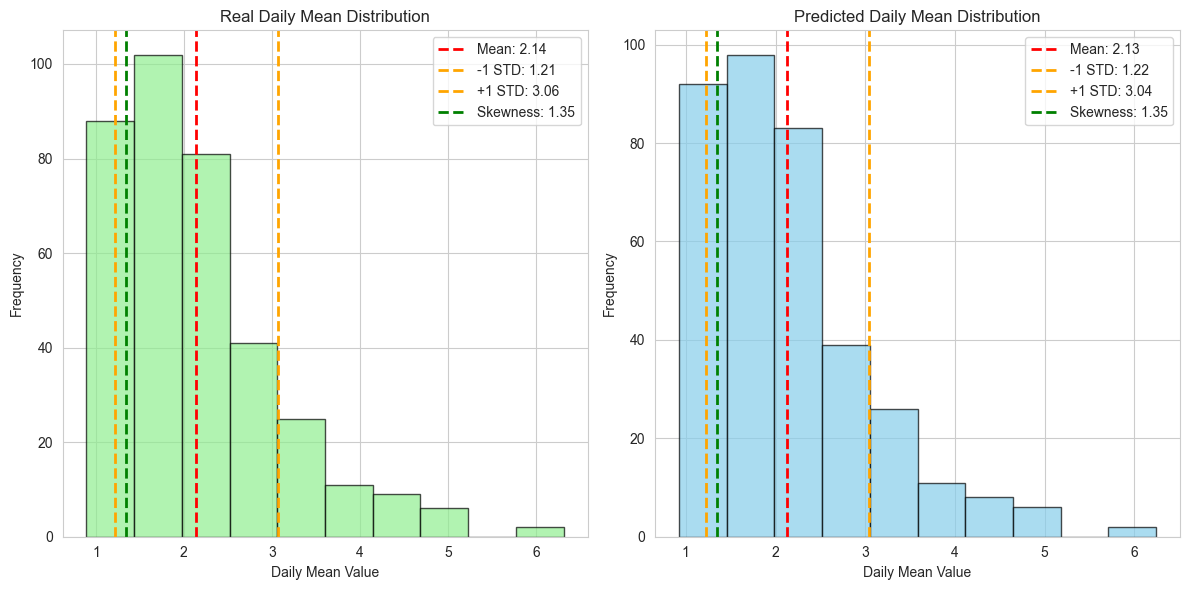

In [79]:
data = pd.concat([pd.DataFrame(predicted_solar), real_solar], axis=1)
data = data.rename(columns={0: "predicted", 'wind_speed': "real"})
from scipy.stats import skew

daily_means = data.groupby(np.arange(len(data)) // 24).mean()
# Calculate mean, standard deviation, and skewness for both datasets
daily_means
stats_predicted = {
    'mean': daily_means['predicted'].mean(),
    'std': daily_means['predicted'].std(),
    'skewness': skew(daily_means['predicted'])
}

stats_real = {
    'mean': daily_means['real'].mean(),
    'std': daily_means['real'].std(),
    'skewness': skew(daily_means['real'])
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Real Daily Means Plot
axes[0].hist(daily_means['real'], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].axvline(stats_real['mean'], color='red', linestyle='dashed', linewidth=2,
                label=f"Mean: {stats_real['mean']:.2f}")
axes[0].axvline(stats_real['mean'] - stats_real['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"-1 STD: {stats_real['mean'] - stats_real['std']:.2f}")
axes[0].axvline(stats_real['mean'] + stats_real['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"+1 STD: {stats_real['mean'] + stats_real['std']:.2f}")
axes[0].axvline(stats_real['skewness'], color='green', linestyle='dashed', linewidth=2,
                label=f"Skewness: {stats_real['skewness']:.2f}")
axes[0].set_title('Real Daily Mean Distribution')
axes[0].set_xlabel('Daily Mean Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Predicted Daily Means Plot
axes[1].hist(daily_means['predicted'], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(stats_predicted['mean'], color='red', linestyle='dashed', linewidth=2,
                label=f"Mean: {stats_predicted['mean']:.2f}")
axes[1].axvline(stats_predicted['mean'] - stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"-1 STD: {stats_predicted['mean'] - stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['mean'] + stats_predicted['std'], color='orange', linestyle='dashed', linewidth=2,
                label=f"+1 STD: {stats_predicted['mean'] + stats_predicted['std']:.2f}")
axes[1].axvline(stats_predicted['skewness'], color='green', linestyle='dashed', linewidth=2,
                label=f"Skewness: {stats_predicted['skewness']:.2f}")
axes[1].set_title('Predicted Daily Mean Distribution')
axes[1].set_xlabel('Daily Mean Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)



plt.tight_layout()
plt.show()

In [ ]:
data.corr()